# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% 23-95% R로 분석 다시보기-3-표본 (57일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 표본과 모집단 R 로 보기 (page 138 - 146)

지금 모래백사장이라는 모집단을 생각합니다. R 에서 모집단을 구현하기 위해서 임의 백만건 정도 랜덤으로 생성합니다. 이 집단을 Z 라고 합시다. 

In [14]:
# 모집단 Z 를 랜덤하게 생성하자.
# 편의상 모래의 평균 굵기를 5, 평균굵기 표준편차를 100 으로 정하자.

Z = rnorm(1000000, mean = 5, sd =100)

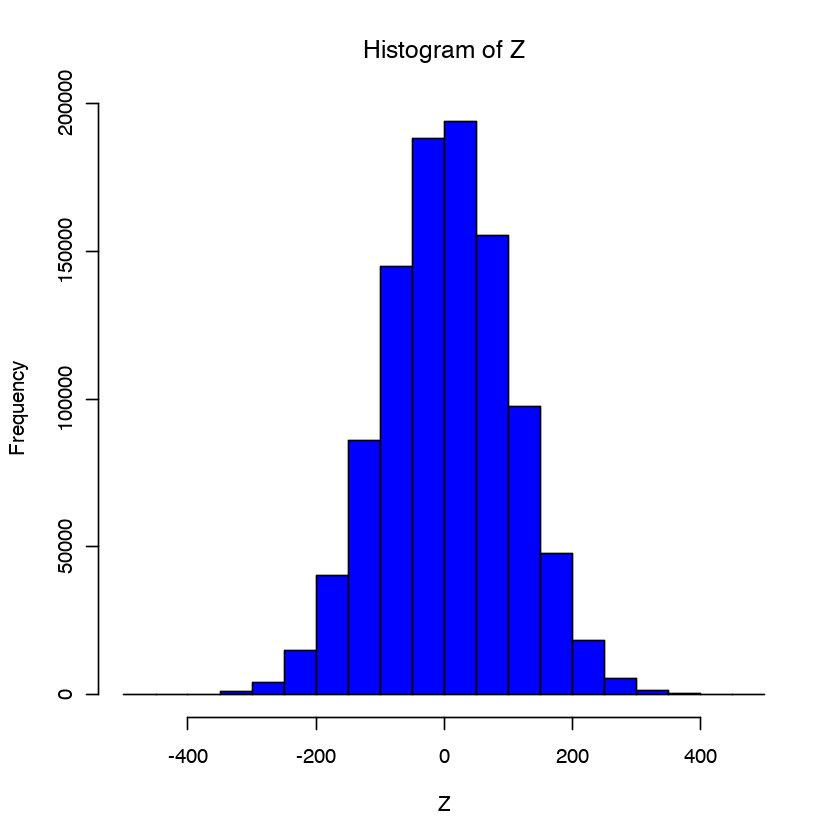

In [31]:
hist(Z, col="blue")

한줌의 모래 갯수가 10,000 개로 하여 한줌의 평균굵기를 10번 반복하여 구해보자.

 [1] 4.4 6.3 5.4 6.7 4.9 4.8 6.3 6.3 6.8 2.9
평균= 5.5   n = 10 


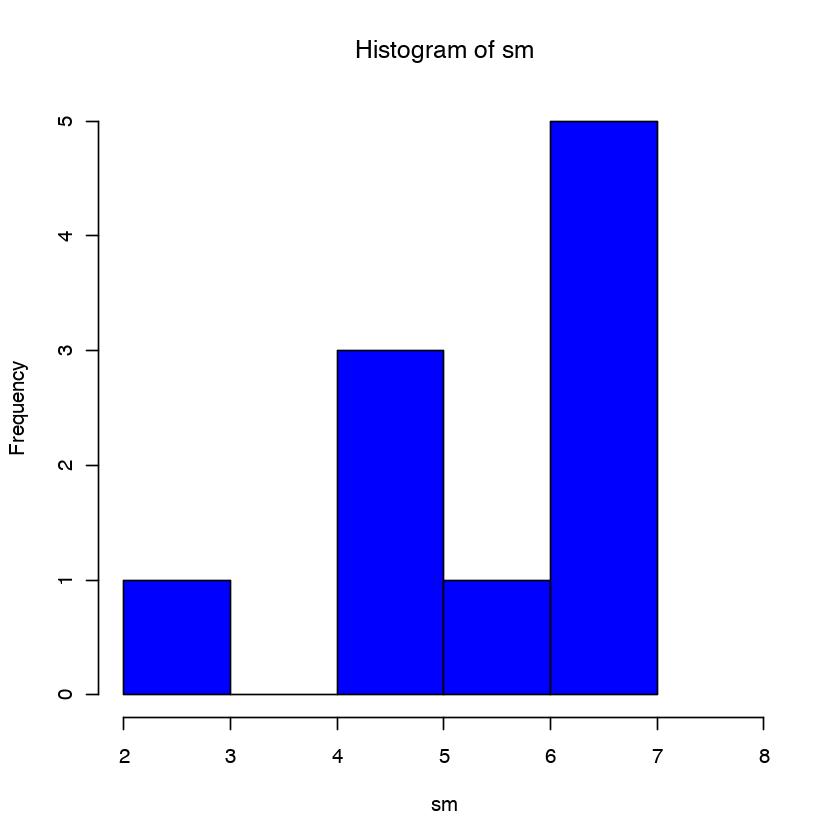

In [15]:
# 평균을 구하기 위한 방 설정
sm <- vector()

# 반복횟수
rep <- 10

for (i in 1:rep) {
    # 모집단에서 크기가 10,000 인 샘플을 가져옴
    samp = sample(Z,size = 10000)
    # 샘플의 평균을 구함.
    sm <- c(sm, mean(samp))
    
}
print(round(sm,1))
# 10 개 평균을 구하면 
cat("평균=", round(mean(sm),1),' ', "n =",length(sm) ,"\n")
# 10 개의 평균값을 히스토그램으로 표현함.
hist(sm, col="blue", xlim=c(2,8))

추가해서 10번을 더해서 모두 20개의 평균및 히스토 그램을 그려보자.

 [1] 2.9 5.2 2.7 5.6 6.1 4.2 5.5 3.4 4.2 6.0 5.3
평균= 5.1   n = 20 


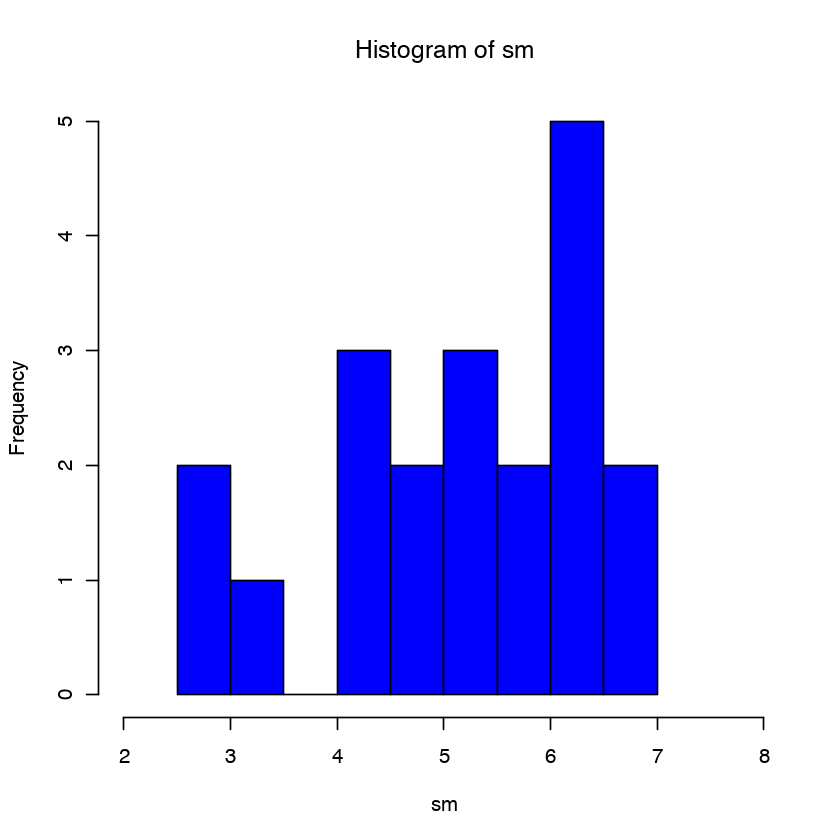

In [16]:
for (i in 1:rep) {
    # 모집단에서 크기가 10,000 인 샘플을 가져옴
    samp = sample(Z,size = 10000)
    # 샘플의 평균을 구함.
    sm <- c(sm, mean(samp))
    
}
print(round(sm[10:20],1))
# 10 개 평균을 구하면 
cat("평균=", round(mean(sm),1),' ', "n =",length(sm) ,"\n")
# 10 개의 평균값을 히스토그램으로 표현함.
hist(sm, col="blue", xlim=c(2,8))

이런 표본을 가져오는것을  1,000 번 시도해서 히스토그램과 평균을 구해보자.

 [1] 5.1 4.2 5.8 5.7 6.3 6.6 4.5 3.3 5.2 5.7 7.6
평균= 5.1   n = 1020 


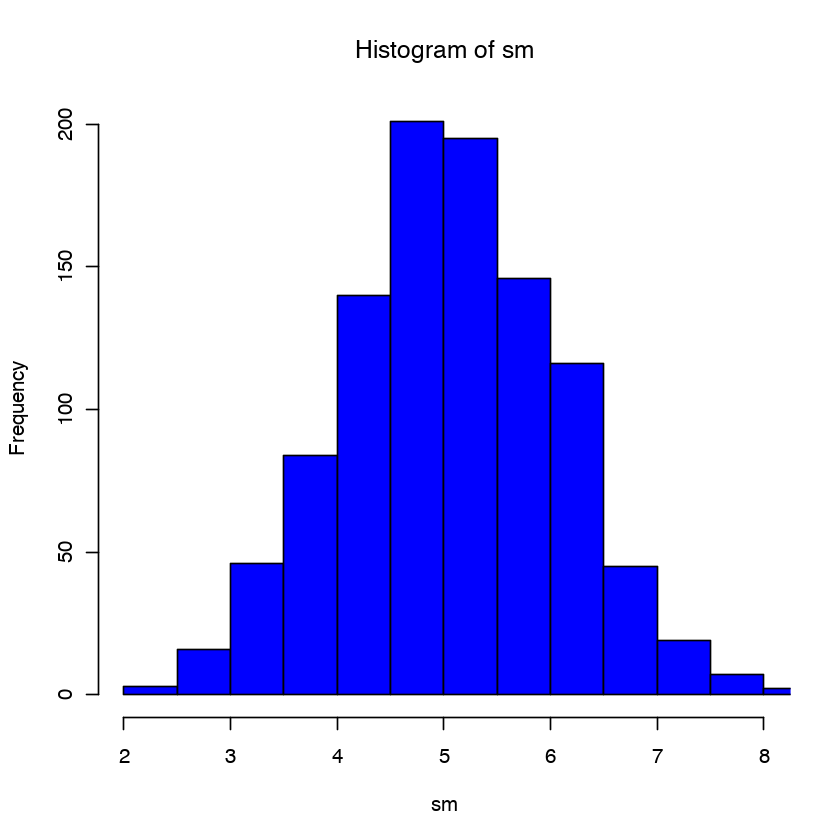

In [17]:
# rep = 1000 으로 하면 총 1020 이 될 것입니다.
for (i in 1:1000) {
    # 모집단에서 크기가 10,000 인 샘플을 가져옴
    samp = sample(Z,size = 10000)
    # 샘플의 평균을 구함.
    sm <- c(sm, mean(samp))
    
}

# 마지막 10개만 출력하자.
print(round(sm[1010:1020],1))
# 평균을 구하면 
cat("평균=", round(mean(sm),1),' ', "n =",length(sm) ,"\n")
# 10 개의 평균값을 히스토그램으로 표현함.
hist(sm, col="blue", xlim=c(2,8))

1,000 번 정도 시행하니, 평균 5를 중심으로 막대 모양이 대칭인것이 나타나고 있습니다. 표준편차를 100 으로 잡아서인지.. 모래 굵기가 8을 넘어가는 것도 있게 됩니다. 표본이 많아 질수록 패턴이 명확하게 나타나게 됩니다.

이제 백만번은 시간이 많이 걸려 십만번 정도 하고 표본 구간을 더 잘게 나누어 보겠습니다.


In [18]:
sm_back <- sm

 [1] 5.1 4.2 5.8 5.7 6.3 6.6 4.5 3.3 5.2 5.7 7.6
평균= 5   n = 101020 


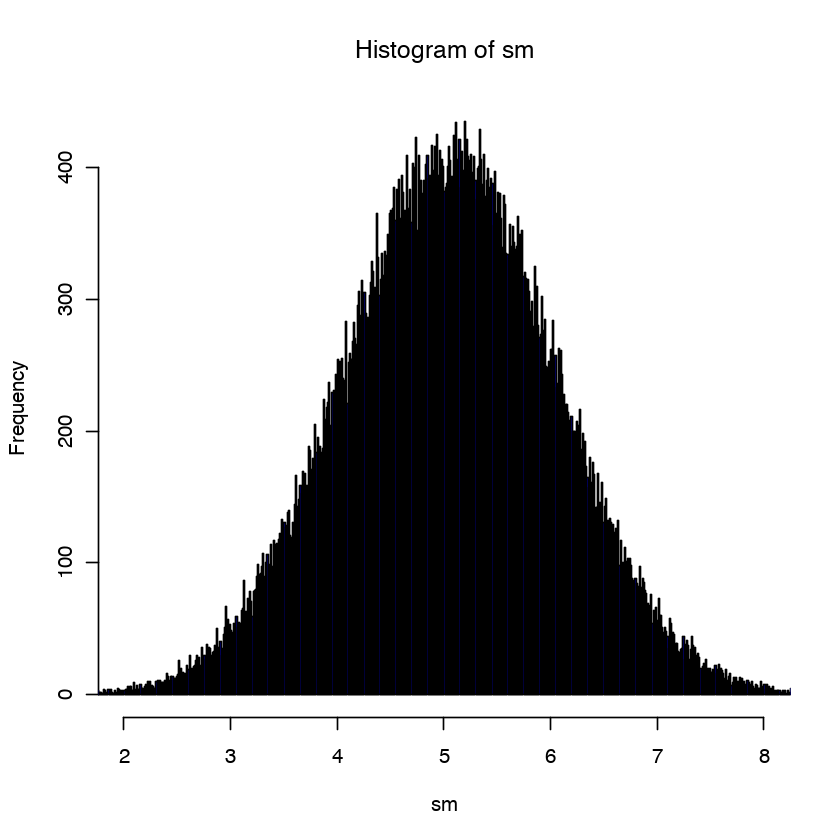

In [28]:
sm <- sm_back

for (i in 1:100000) {
    # 모집단에서 크기가 10,000 인 샘플을 가져옴
    samp = sample(Z,size = 10000)
    # 샘플의 평균을 구함.
    sm <- c(sm, mean(samp))
    
}

# 마지막 10개만 출력하자.
print(round(sm[1010:1020],1))
# 평균을 구하면 
cat("평균=", round(mean(sm),1),' ', "n =",length(sm) ,"\n")
# 10 개의 평균값을 히스토그램으로 표현함.
hist(sm, col="blue", xlim=c(2,8), breaks = length(sm)/100)

십만개를 2에서 8 사이에 모두 1020개의 빈을 표시하도록 하였습니다. 따라서 하나 빈 간격이 0.06 정도 입니다. 모집단에서 모두 십만개의 표본을 가져와서 평균을 구해보면, 이들은 정규분포의 모습을 갖게 됩니다. 

평균은 5에 가까워 지고 있습니다.